## Data Pre-processing and Cleaning

### Read in raw dataset

In [10]:
import pandas as pd

metadata = pd.read_csv("Adelie Penguin Diet Metadata.csv")
composition = pd.read_csv("Adelie Penguin Diet Composition.csv")
ice = pd.read_csv("Annual Sea Ice.csv")

### Join metadata and diet composition table

In [11]:
composition = composition[["Sample Number", "Sample Weight (g)", "E. superba Weight (g)", "Number of E. superba", 
                           "T. macrura Weight (g)", "Number of T. macrura", "Fish Weight (g)", "Number of Fish"]]
raw = pd.merge(metadata, composition, how="inner", on=["Sample Number"])
# there are some duplicate samples with exactly the same data, so delete arbitrary one
raw = raw[~raw.duplicated(subset=['Sample Number'], keep='last')].reset_index().drop(columns=['index'])

### Clean up low quality data

In [12]:
# Data from study PAL9192 (conducted in year 1992) didn't record sex of the penguin, and the sample weight. Since it
# doesn't make sense to fill in missing data with average value or anying guess we may have, we decide to delete all 
# data from PAL9192 (a total of 40 rows).
raw = raw[raw["studyName"] != "PAL9192"].reset_index(drop=True)

### Extract year and month from date column

In [13]:
raw['Date'] = pd.to_datetime(raw['Date'], errors='coerce')
raw['year'] = raw['Date'].dt.year.fillna(0.0).astype(int)
raw['month'] = raw['Date'].dt.month.fillna(0.0).astype(int)

In [14]:
raw.to_csv("diet_info.csv")

### process sea ice data set

In [15]:
# filter out data from the years that have penguin data
ice = ice[(ice["Year"] >= 1993) & (ice["Year"] <= 2018)].reset_index(drop=True)
ice

,Year,WAP_Ext,WAP_Area,WAP_OW,Pori_Ext,Pori_Area,Pori_OW,Pdsr_Ext,Pdsr_Area,Pdsr_OW,Pnew_Ext,Pnew_Area,Pnew_OW
0,1993,278396.22,186348.88,92047.34,93329.05,58733.72,34595.33,78055.52,51414.36,26641.16,126987.16,92039.71,34947.46
1,1994,331344.44,224949.88,106394.57,100652.60,69728.98,30923.63,77017.16,57300.80,19716.36,125910.66,98827.99,27082.67
2,1995,343714.22,247257.42,96456.84,94145.40,70829.65,23315.75,72966.73,55262.05,17704.68,121592.54,94837.16,26755.37
3,1996,268404.44,185004.19,83400.26,80612.66,52814.39,27798.27,69315.12,46421.98,22893.13,117947.38,87208.90,30738.49
4,1997,317893.06,214155.98,103737.07,96598.32,64420.90,32177.42,77396.02,54321.39,23074.64,123234.56,92184.12,31050.44
5,1998,211052.39,129786.81,81265.59,72051.26,37776.65,34274.61,56966.11,30123.95,26842.15,102169.47,61797.33,40372.14
6,1999,246552.58,167717.56,78835.02,77972.52,51971.15,26001.37,63938.10,45096.04,18842.06,99988.25,75103.88,24884.36
7,2000,256058.89,171009.11,85049.81,74287.41,46983.73,27303.69,61718.25,40590.15,21128.10,107138.40,76604.84,30533.56
8,2001,229946.62,156173.53,73773.06,67177.42,44991.81,22185.60,56913.30,40178.68,16734.61,96801.55,72177.66,24623.89
9,2002,360588.59,241644.44,118944.15,105466.23,72432.89,33033.35,87834.91,63105.97,24728.95,137178.92,105090.49,32088.44


In [16]:
ice.melt(id_vars=["Year"], 
        var_name="Location", 
        value_name="Area")

,Year,Location,Area
0,1993,WAP_Ext,278396.22
1,1994,WAP_Ext,331344.44
2,1995,WAP_Ext,343714.22
3,1996,WAP_Ext,268404.44
4,1997,WAP_Ext,317893.06
...,...,...,...
307,2014,Pnew_OW,36078.68
308,2015,Pnew_OW,24028.48
309,2016,Pnew_OW,55190.36
310,2017,Pnew_OW,34379.37


<AxesSubplot:xlabel='Year'>

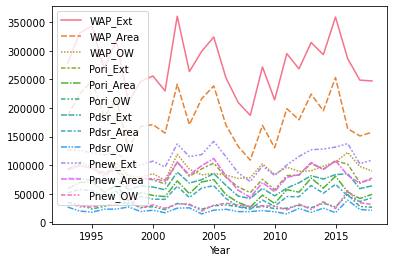

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plot_data = ice.set_index("Year")

sns.lineplot(data=plot_data)

Most of the sea ice area data follows the same trend. Thus, we can use any single line as a representation of the whole area.

## Primitive analysis on diet composition

### Correlation  between sample weight and other attributes

<AxesSubplot:xlabel='Bird Weight (g)', ylabel='Sample Weight (g)'>

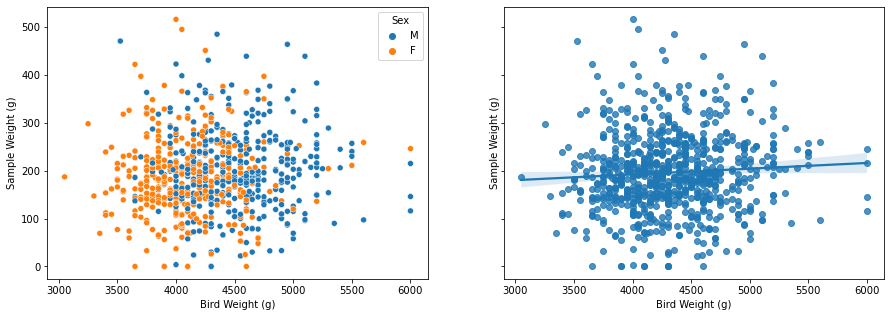

In [18]:
plot_data = raw[raw["Bird Weight (g)"] != 0]
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,5))
sns.scatterplot(data=plot_data, x="Bird Weight (g)", y="Sample Weight (g)", hue="Sex", ax=ax1)
sns.regplot(data=plot_data, x="Bird Weight (g)", y="Sample Weight (g)", ax=ax2)

1. Female penguin is generally lighter than male penguin.
2. There is no clear correlation between sample weight and bird weight

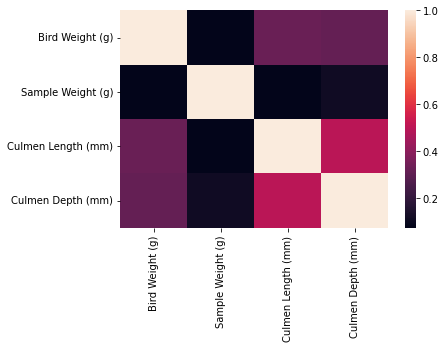

In [19]:
sns.heatmap(raw[["Bird Weight (g)", "Sample Weight (g)", "Culmen Length (mm)", "Culmen Depth (mm)"]].corr());

There is no clear correlation between these attributes

### Does weight of each food component varies across year/month?

,studyName,Date,Island,Colony,Time,Sample Number,Bird Weight (g),Sex,Culmen Length (mm),Culmen Depth (mm),Sample Weight (g),E. superba Weight (g),Number of E. superba,T. macrura Weight (g),Number of T. macrura,Fish Weight (g),Number of Fish,year,month
0,PAL9293,1993-01-11,TOR,12,1700,92001,4600,M,39.5,18.4,439.00,624.00,1376,0.0,0,0.0,0,1993,1
1,PAL9293,1993-01-11,TOR,12,1700,92002,3950,F,33.5,17.6,212.00,390.00,650,0.0,0,0.0,0,1993,1
2,PAL9293,1993-01-11,TOR,12,1700,92003,4000,M,36.0,17.4,220.00,466.00,645,0.0,0,0.0,0,1993,1
3,PAL9293,1993-01-11,TOR,12,1700,92004,4950,M,39.3,20.6,247.00,350.00,569,0.0,0,0.0,0,1993,1
4,PAL9293,1993-01-11,TOR,12,1700,92005,4000,F,35.1,16.2,113.00,141.00,329,0.0,0,0.0,0,1993,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,PAL1718,2018-01-29,TOR,BCH,1730,17021,4750,M,39.7,18.0,104.33,104.33,497,0.0,0,0.0,0,2018,1
763,PAL1718,2018-01-29,TOR,BCH,1730,17022,4000,F,35.3,16.8,110.97,110.97,282,0.0,0,0.0,0,2018,1
764,PAL1718,2018-01-29,TOR,BCH,1730,17023,4150,M,40.7,18.8,72.30,70.20,245,0.0,0,2.1,1,2018,1
765,PAL1718,2018-01-29,TOR,BCH,1730,17024,4600,M,42.0,18.0,296.50,295.50,881,0.0,0,0.5,1,2018,1


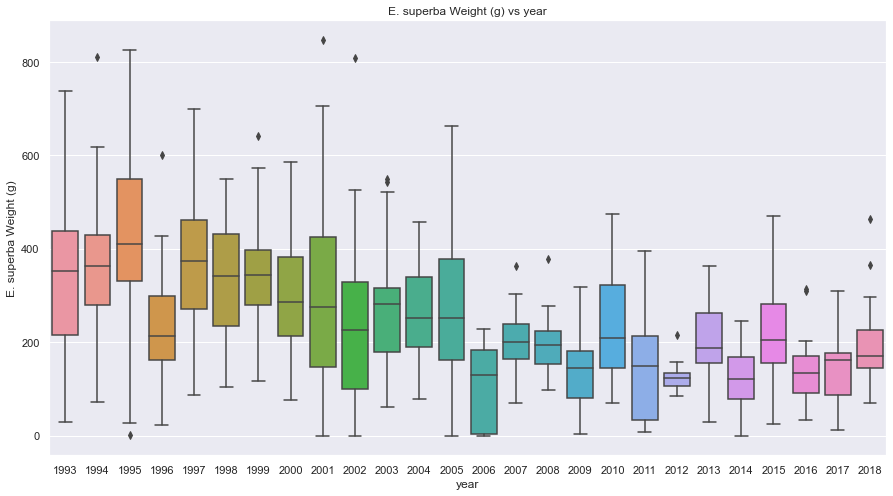

In [20]:
plot_data = raw[raw["year"] != 0]
sns.set(rc={'figure.figsize':(15, 8)})
sns.boxplot(x="year", y="E. superba Weight (g)", data=plot_data).set_title('E. superba Weight (g) vs year')
plot_data

Text(0.5, 1.0, 'Sample Weight (g) vs year')

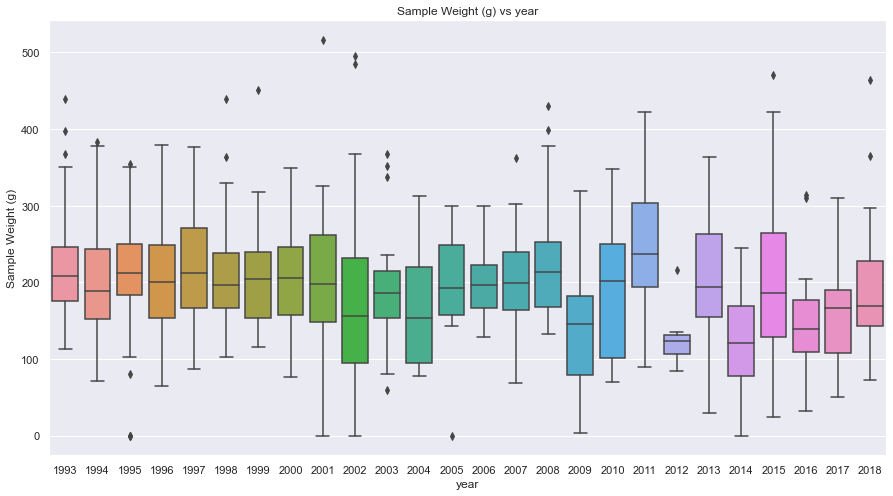

In [40]:
sns.boxplot(x="year", y="Sample Weight (g)", data=plot_data).set_title('Sample Weight (g) vs year')

Text(0.5, 1.0, 'T. macrura Weight (g) vs year')

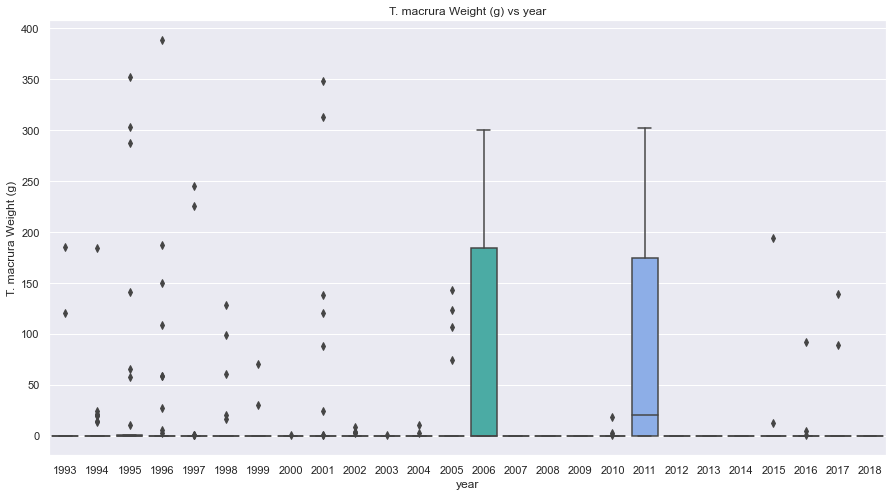

In [41]:
sns.boxplot(x="year", y="T. macrura Weight (g)", data=plot_data).set_title('T. macrura Weight (g) vs year')

Text(0.5, 1.0, 'T. macrura Weight (g) vs month')

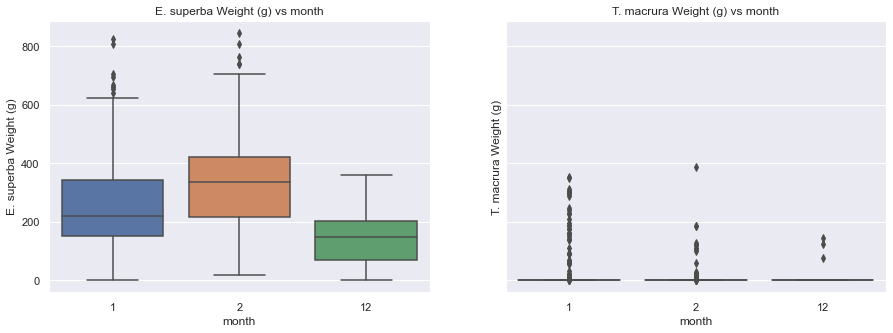

In [42]:
plot_data = raw[raw["month"] != 0]
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,5))
sns.boxplot(x="month", y="E. superba Weight (g)", data=plot_data, ax=ax1).set_title('E. superba Weight (g) vs month')
sns.boxplot(x="month", y="T. macrura Weight (g)", data=plot_data, ax=ax2).set_title('T. macrura Weight (g) vs month')

1. There are a lot of missing data in T. macrura
2. Variance of E. superba according to year/month. What is the possible cause? Weather? Sea Ice?

> Primary prey components include krill and fish, and secondary prey components include octopus, squid amphipods, mysid shrimp, limpets and small clams.

> Variability in diets within and between seasons is strongly linked to variability in the marine environment such as the presence or absence of sea ice and the timing and persistence of phytoplankton blooms, and thus affects a host of Adélie penguin life history parameters.

### Why does E. superba Weight varies across year

<AxesSubplot:xlabel='year', ylabel='E. superba Weight (g)'>

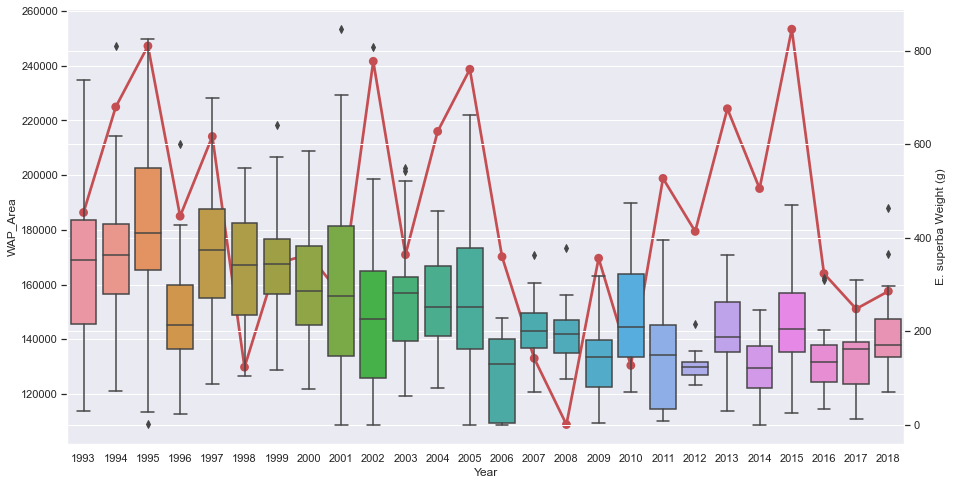

In [44]:
plot_data = raw[raw["year"] != 0]
sns.pointplot(data=ice, x="Year", y="WAP_Area", color='r')
ax2 = plt.twinx()
sns.boxplot(x="year", y="E. superba Weight (g)", data=plot_data, ax=ax2)

In [20]:
krill = pd.read_csv("Adelie Penguin Diet Composition, Krill.csv")
krill = krill[krill["studyName"] != "PAL9192"].reset_index(drop=True)
krill = krill.drop(["studyName"], axis=1)
krill['Date'] = pd.to_datetime(krill['Sample Collection Date'], errors='coerce')
krill['year'] = krill['Date'].dt.year.fillna(0.0).astype(int)
krill['month'] = krill['Date'].dt.month.fillna(0.0).astype(int)
krill = krill.drop(["Sample Collection Date"], axis=1)
krill.to_csv("krill_info.csv")
krill

,Sample Number,Total Number,16-20mm,21-25mm,26-30mm,31-35mm,36-40mm,41-45mm,46-50mm,51-55mm,56-60mm,61-65mm,Date,year,month
0,92001,53,0,0,6,22,8,10,7,0,0,0,1993-01-11,1993,1
1,92002,50,0,3,11,20,7,8,1,0,0,0,1993-01-11,1993,1
2,92003,52,0,0,7,27,14,1,3,0,0,0,1993-01-11,1993,1
3,92004,56,0,0,7,19,17,10,2,1,0,0,1993-01-11,1993,1
4,92005,50,0,0,0,30,11,6,2,1,0,0,1993-01-11,1993,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,17021,77,0,10,31,15,9,10,2,0,0,0,2018-01-29,2018,1
766,17022,42,0,0,5,6,11,13,6,1,0,0,2018-01-29,2018,1
767,17023,67,0,1,17,23,5,20,1,0,0,0,2018-01-29,2018,1
768,17024,96,0,6,20,19,24,25,2,0,0,0,2018-01-29,2018,1


In [55]:
plot_data = krill.drop(["Sample Number", "month"], axis=1).groupby(['year']).mean()
plot_data

,Total Number,16-20mm,21-25mm,26-30mm,31-35mm,36-40mm,41-45mm,46-50mm,51-55mm,56-60mm,61-65mm
year,,,,,,,,,,,
1993,52.875000,0.000000,0.075000,1.875000,16.225000,18.025000,12.325000,3.875000,0.475000,0.000000,0.000000
1994,55.225000,0.000000,0.000000,0.200000,1.825000,14.550000,25.325000,11.100000,2.225000,0.000000,0.000000
1995,49.125000,0.025000,0.025000,0.400000,1.725000,5.925000,18.175000,19.200000,3.525000,0.125000,0.000000
1996,55.975000,1.000000,1.300000,2.500000,7.825000,6.925000,7.525000,16.850000,10.825000,1.225000,0.000000
1997,71.511111,0.177778,2.977778,8.266667,29.555556,19.066667,8.444444,2.555556,0.422222,0.044444,0.000000
1998,72.380000,0.020000,0.320000,3.460000,20.740000,31.280000,14.200000,2.200000,0.160000,0.000000,0.000000
1999,62.533333,0.022222,0.022222,0.466667,5.888889,21.088889,25.533333,8.977778,0.533333,0.000000,0.000000
2000,59.288889,0.133333,1.088889,0.955556,1.711111,3.866667,17.000000,23.755556,9.933333,0.844444,0.000000
2001,48.265306,0.469388,0.816327,1.673469,4.591837,3.734694,3.836735,13.244898,15.836735,3.918367,0.142857


<function matplotlib.pyplot.show(close=None, block=None)>

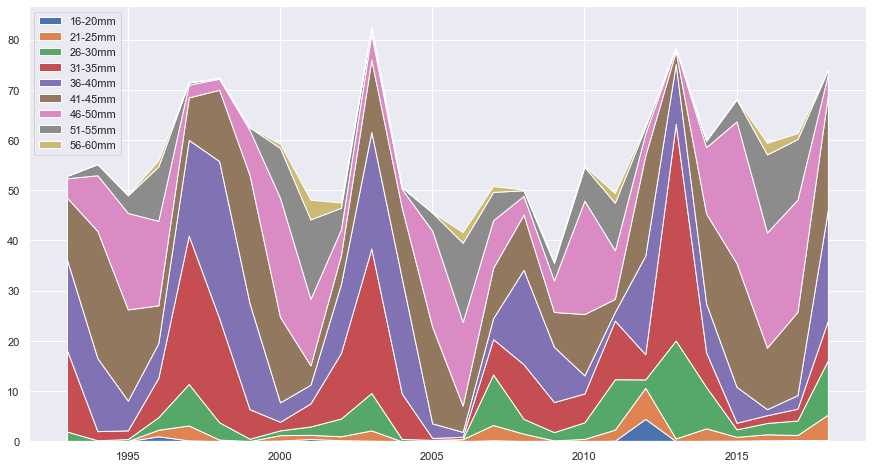

In [66]:
x = plot_data.index
labels = ["16-20mm", "21-25mm", "26-30mm", "31-35mm", "36-40mm", "41-45mm", "46-50mm", "51-55mm", "56-60mm"]
y1 = plot_data["16-20mm"]
y2 = plot_data["21-25mm"]
y3 = plot_data["26-30mm"]
y4 = plot_data["31-35mm"]
y5 = plot_data["36-40mm"]
y6 = plot_data["41-45mm"]
y7 = plot_data["46-50mm"]
y8 = plot_data["51-55mm"]
y9 = plot_data["56-60mm"]
plt.stackplot(x, y1, y2, y3, y4, y5, y6, y7, y8, y9, labels=labels)
plt.legend(loc='upper left')
plt.show